# Analysis of Heart Disease Dataset

In [1]:
import pandas as pd #importing necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
heart=pd.read_csv('C:/Users/Sonal/Desktop/heart.csv') #reading the csv file into pandas dataframe

In [3]:
heart.head() #quick look at the dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
heart.shape #dataset has 1025 rows and 14 columns

(1025, 14)

In [5]:
heart.isnull().sum()  #checking for null values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.describe() #evaluating the numberical variables of the dataset

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# Summary statistics

### Correlation Matrix 

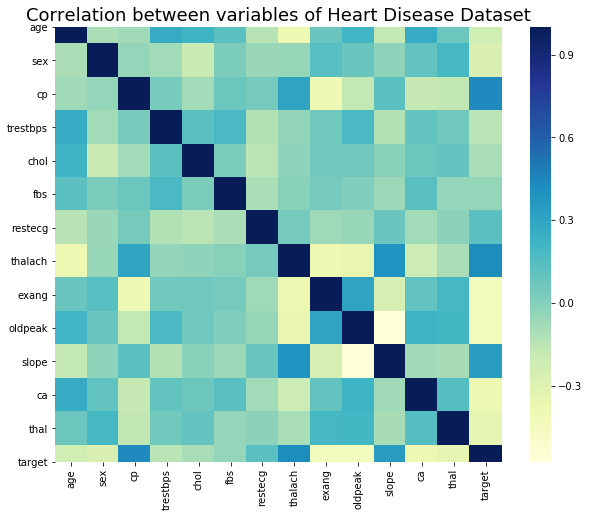

In [7]:
#creating a heatmap of correlation between the dataset variables
corr = heart.corr()  
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='YlGnBu')
plt.title('Correlation between variables of Heart Disease Dataset',fontsize=18)
plt.show()

### Count of heart diseases in males and females.

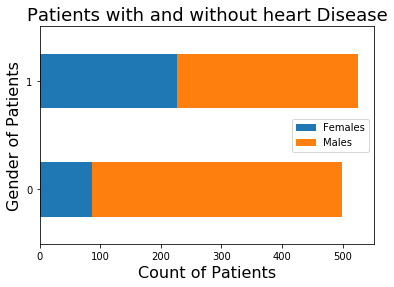

In [8]:
heart.groupby(['target','sex']).size().unstack().plot(kind='barh',stacked='True')
plt.title('Patients with and without heart Disease',fontsize=18)
plt.xlabel('Count of Patients',fontsize=16)
plt.ylabel('Gender of Patients',fontsize=16)
legend=('Females','Males')
plt.legend(legend)
plt.show()

### Age distribution of patients

In [9]:
fig=px.histogram(heart,x='age',color='target')
fig.update_layout(
    title="Age distribution of patients.",
    xaxis_title="Age(years)",
    yaxis_title="Number of Patients",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"))
fig.show()

### Relationship between types of Chest Pain and Heart Disease

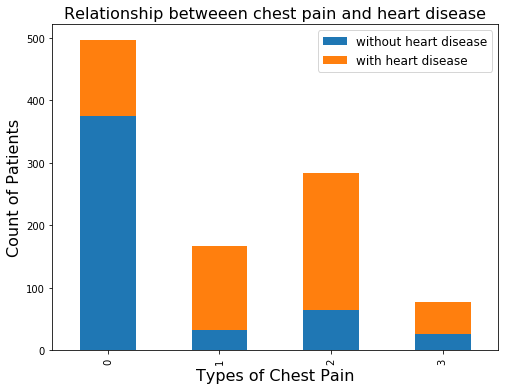

In [10]:
fig0=heart.groupby(['cp','target']).size().unstack().plot(kind='bar',stacked='True',figsize=(8,6))
pos = np.arange(len(heart.cp))
xticks=(pos, heart['cp'])
plt.xlabel('Types of Chest Pain',fontsize=16)
plt.ylabel('Count of Patients',fontsize=16)           
plt.title('Relationship betweeen chest pain and heart disease',fontsize=16)
legend=('without heart disease','with heart disease')
plt.legend(legend,fontsize=12)
fig0

### Number Of Major Vessels Colored By Fluoroscopy

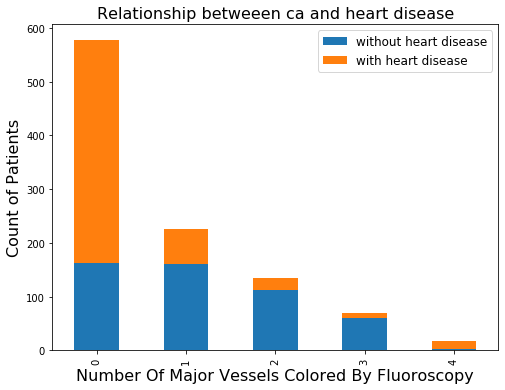

In [11]:
fig1=heart.groupby(['ca','target']).size().unstack().plot(kind='bar',stacked='True',figsize=(8,6))
pos = np.arange(len(heart.cp))
xticks=(pos, heart['ca'])
plt.xlabel('Number Of Major Vessels Colored By Fluoroscopy',fontsize=16)
plt.ylabel('Count of Patients',fontsize=16)           
plt.title('Relationship betweeen ca and heart disease',fontsize=16)
legend=('without heart disease','with heart disease')
plt.legend(legend,fontsize=12)
fig1

### Relationship betweeen slope and heart disease

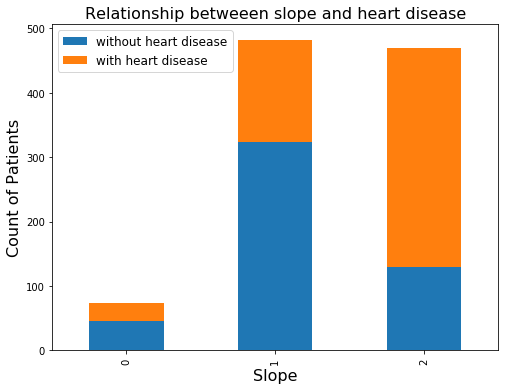

In [12]:
fig2=heart.groupby(['slope','target']).size().unstack().plot(kind='bar',stacked='True',figsize=(8,6))
pos = np.arange(len(heart.cp))
xticks=(pos, heart['slope'])
plt.xlabel('Slope',fontsize=16)
plt.ylabel('Count of Patients',fontsize=16)           
plt.title('Relationship betweeen slope and heart disease',fontsize=16)
legend=('without heart disease','with heart disease')
plt.legend(legend,fontsize=12)
fig2

In [13]:
fig = px.histogram(heart, x="trestbps",y="chol",color="target")
fig.update_layout(title="Levels of resting blood pressure and cholesterol in patients",
                  xaxis_title="Serum Cholesterol(mg/dl) ",
                  yaxis_title="Resting Blood Pressure(mmhg)",
                  font=dict(
                      family="Courier New, monospace",
                      size=16,color="#7f7f7f"))
          
fig.show()

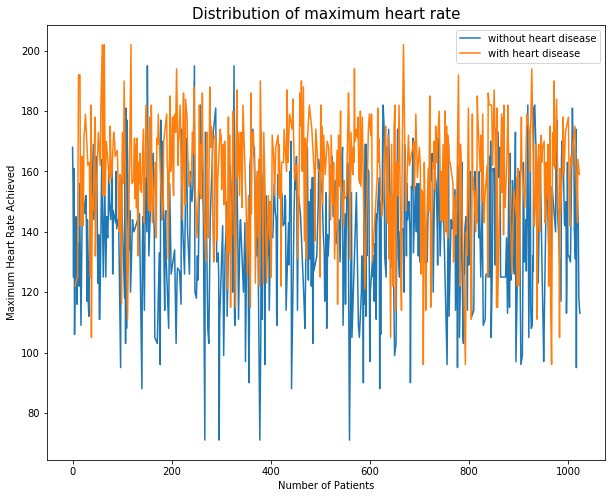

In [14]:
plt.figure(figsize=(10,8))
plt.plot(heart[heart.target==0].thalach,label='without heart disease')
plt.plot(heart[heart.target==1].thalach,label="with heart disease")
plt.xlabel('Number of Patients')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Distribution of maximum heart rate',fontsize=15)
plt.legend()

# Unsupervised Learing

In [15]:
from sklearn import metrics #importing the necessary packages for unsupervised learning
from sklearn import cluster 
from sklearn.preprocessing import scale #for scaling the attributes

In [16]:
attributes=heart.values[:,0:12] #Choosing the variables for our attributes
outcome=heart.values[:,13] #choosing the value to be predicted ('target')

In [17]:
scaled_data=scale(attributes) #scaling the attributes

### Kmeans Clustering 

In [18]:
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(outcome)) #number of clusters

In [19]:
kmeans = cluster.KMeans(n_clusters=n_digits) #kmeans clustering model 
kmeans.fit(scaled_data) #fitting the data into the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
from sklearn.preprocessing import LabelEncoder #processing

In [21]:
Y2 = LabelEncoder().fit_transform(outcome) #transforming

In [22]:
for k in range(1,20):
    kmeans = cluster.KMeans(n_clusters=k)     
    kmeans.fit(scaled_data) 

In [23]:
predict = kmeans.predict(scaled_data)

Text(0.5, 1.0, 'kmeans clusters')

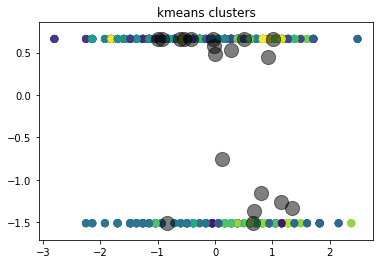

In [24]:
#visualizing the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('kmeans clusters')

In [45]:
#checking the accuracy of the model
print("Completeness score",metrics.completeness_score(outcome, kmeans.labels_))

Completeness score 0.09032867999534555


In [46]:
print("Homogeneity score",metrics.homogeneity_score(outcome, kmeans.labels_))

Homogeneity score 0.37071321714258876


In [47]:
print("Silhouette score",metrics.silhouette_score(scaled_data, kmeans.labels_))

Silhouette score 0.16073511025058815


# Supervised learning

In [28]:
#splitting the train test data
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(scaled_data,outcome,train_size=0.30)

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier for supervised learning
model = DecisionTreeClassifier() #creating a model
model.fit(X_train, Y_train) #trainig

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
predicted = model.predict(X_test) #testing and predicting

In [31]:
X_test.shape #70-30split

(718, 12)

In [32]:
X_train.shape #70-30 split

(307, 12)

To check the Decision Tree Classifier lets put the results in a dataframe and then compare them with the actual data.

In [33]:
heart_test_results=pd.DataFrame(predicted,columns=['predicted']) #predicted test results
actual_test_results=pd.DataFrame(Y_test,columns=['actual']) #actual test results
heart_test_results['Correct']=heart_test_results['predicted']==actual_test_results['actual'] #correct test results

In [34]:
print(heart_test_results['Correct'].value_counts())

True     665
False     53
Name: Correct, dtype: int64


### From above we can see that 665 results were predicted correctly while 53 were predicted incorrectly. 

Text(0.5, 0, 'Number of correct predictions')

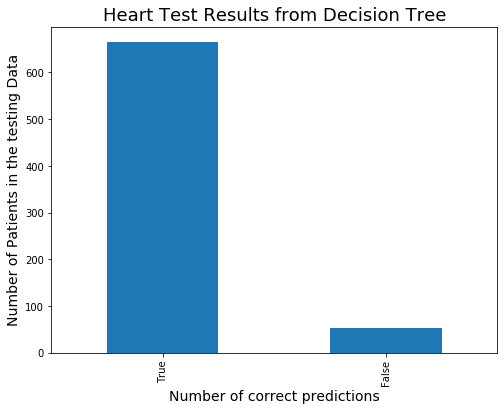

In [35]:
#visualizing the results of Decision Tree Classifer
heart_test_results['Correct'].value_counts().plot.bar(figsize=(8,6))
plt.title('Heart Test Results from Decision Tree',fontsize=18)
plt.ylabel('Number of Patients in the testing Data',fontsize=14)
plt.xlabel('Number of correct predictions',fontsize=14)

In [36]:
print(metrics.classification_report(Y_test, predicted)) #checking the accuracy

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       348
         1.0       0.94      0.91      0.93       370

    accuracy                           0.93       718
   macro avg       0.93      0.93      0.93       718
weighted avg       0.93      0.93      0.93       718



In [49]:
print(metrics.confusion_matrix(Y_test, predicted)) #confusion matrix

[[288  60]
 [ 72 298]]


#### From above score we can see that the accuracy of the classifier is 93%, which means that the classifier was able to clasify 93% of the testing data correctly

### K-N Neighbors

In [50]:
#KNN for supervised learning
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier() #creating the model
model.fit(X_train, Y_train) #fitting the training set
print(model) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [51]:
predicted = model.predict(X_test) #predicitng the outcome on testing set

In [52]:
print(metrics.classification_report(Y_test, predicted))  #accuracy of the results

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       348
         1.0       0.83      0.81      0.82       370

    accuracy                           0.82       718
   macro avg       0.82      0.82      0.82       718
weighted avg       0.82      0.82      0.82       718



In [53]:
print(metrics.confusion_matrix(Y_test, predicted)) #confusion matrix

[[288  60]
 [ 72 298]]


#### From above score we can see that the accuracy of the classifier is 82%, which means that the classifier was able to clasify 82% of the testing data correctly

In [54]:
heart_test_results=pd.DataFrame(predicted,columns=['predicted'])
actual_test_results=pd.DataFrame(Y_test,columns=['actual'])
heart_test_results['Correct']=heart_test_results['predicted']==actual_test_results['actual']

In [55]:
print(heart_test_results['Correct'].value_counts())

True     586
False    132
Name: Correct, dtype: int64


Text(0.5, 0, 'Number of correct predictions')

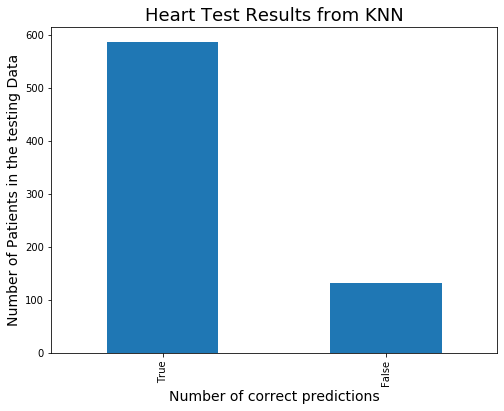

In [44]:
#visualizing the resultS of KNN
heart_test_results['Correct'].value_counts().plot.bar(figsize=(8,6))
plt.title('Heart Test Results from KNN',fontsize=18)
plt.ylabel('Number of Patients in the testing Data',fontsize=14)
plt.xlabel('Number of correct predictions',fontsize=14)

## Thank You